In [1]:
import numpy as np
import matplotlib.pyplot as plt

k=64
x = np.random.uniform(low=0,high=0.5,size=(k,1))
plt.plot(x, 'r')
x = np.transpose(x)

In [2]:
def dftmatrix(n):
    dft_mat = []
    for i in range(n):
        for j in range(n):
            k = i*j
            k1 = np.exp(-((2*1j*np.pi*k)/n))
            dft_mat = np.append(dft_mat,k1)
    dft_mat = np.reshape(dft_mat,(n,n))      
    return dft_mat

# def dftmatrix(Nfft=32):
#     k= np.arange(Nfft)
#     n = np.arange(Nfft)
#     U = np.matrix(np.exp(-(1j* 2*np.pi/Nfft *k*n[:,None])))
#     return U

def dctmatrix(N):
    dct_mat=[]
    for n in range(N):
        for k in range(N):
            ans = np.cos((np.pi*k*(2*n+1))/(2*N))
            dct_mat = np.append(dct_mat, ans)
            
    dct_mat = np.reshape(dct_mat,(N,N))   
 
    return dct_mat

# def dctmatrix(Nfft):
#     k= np.arange(Nfft)
#     n = np.arange(Nfft)
#     U = np.matrix(np.cos((np.pi*k*(2*n[:,None]+1))/(2*Nfft))) 
#     return U

def haar(N):
    final=[]
    if N==2:
        return(np.matrix(([1,1],[1,-1])))
    v = np.log2(N)-1
    hn2 = haar(N/2)
    result1 = np.concatenate((hn2,hn2),axis=1)
    matrix1 = (pow(2,v/2))*np.identity(int(N/2))
    result2 = np.concatenate((matrix1,-matrix1),axis=1)
    final = np.concatenate((result1,result2),axis=0)
    return(final)

C:\Users\nishc\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


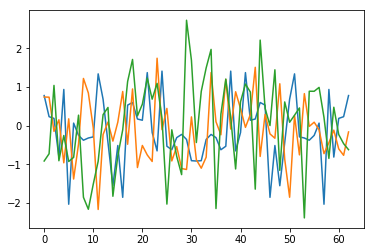

In [3]:
#calculating dft
dft = np.matmul(x,dftmatrix(k))
plt.plot(np.transpose(dft)[1:])

# calculating dct
dct = np.matmul(x,dctmatrix(k))
plt.plot(np.transpose(dct)[1:])


#calculating haar
haar1 = np.transpose(haar(k))
yhaar = np.matmul(x,haar1)
yhaar = np.array(yhaar)
plt.plot(np.transpose(yhaar)[1:])

In [4]:
def update_dft(l,ydft,k):
    a = (int((k+1-l)/2))
    b = (int((k+1+l)/2))
    for k in range(a,b, 1):
        ydft[0][k] = 0
    return ydft

def update_dct(l,dct):
    for i in range(l):
        dct[0][l]=0
    return(dct)

def update_haar(l,haar):
    for i in range(l):
        haar[0][l]=0
    return(haar)

def MSE(x,y,k):
    diff=0
    for i in range(k):
        diff += np.square(abs(x[0][i]- y[0][i]))    
    return(diff/k)

In [5]:
inputx = np.arange(0,k,1)

#DFT error
error_dft=[]
for L in range(k):
    dft_updated = update_dft(L,dft,k)
    xinv = np.linalg.inv(dftmatrix(k))    
    dft_out = np.matmul(dft_updated,xinv)
    error_dft = np.append(error_dft,MSE(x,dft_out,k))

#DCT error
error_dct=[] 
for L in range(k):
    dct_updated = update_dct(L,dct)
    yinv = np.linalg.inv(dctmatrix(k))
    dct_out = np.matmul(dct_updated,yinv)
    error_dct= np.append(error_dct,MSE(x,dct_out,k))

#HAAR error
error_haar=[] 
for L in range(k):
    haar_updated = update_haar(L,yhaar)
    zinv = np.linalg.inv(np.transpose(haar(k)))
    haar_out = np.matmul(haar_updated,zinv)
    haar_out = np.array(haar_out)
    error_haar= np.append(error_haar,MSE(x,haar_out,k))

Text(0.5,1,'DFT')

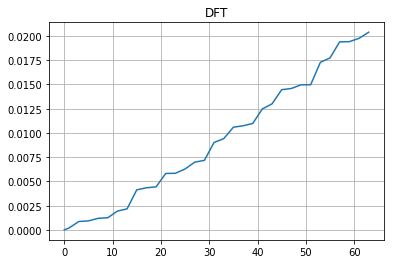

In [6]:
plt.grid()
plt.plot(inputx,error_dft)
plt.title('DFT')

Text(0.5,1,'DCT')

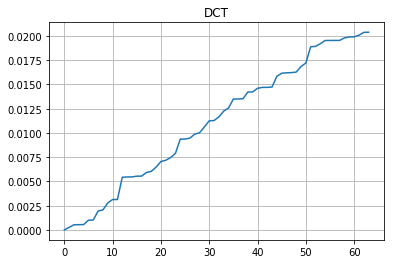

In [7]:
plt.grid()
plt.plot(inputx,error_dct)
plt.title('DCT')

Text(0.5,1,'HAAR')

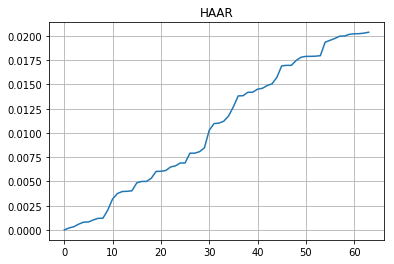

In [8]:
plt.grid()
plt.plot(inputx,error_haar)
plt.title('HAAR')

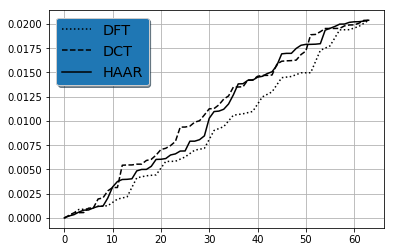

In [9]:
# Comparision
fig, ax = plt.subplots()
ax.plot(inputx,error_dft, 'k:', label='DFT') 
ax.plot(inputx,error_dct,'k--', label = 'DCT') 
ax.plot(inputx,error_haar, 'k', label='HAAR')
ax.grid()
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('C0')

plt.show()